# Laboratorio 10

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

%matplotlib inline

In [7]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
target_names = breast_cancer.target_names

## Ejercicio 1

(1 pto.)

Ajusta una regresión logística a los datos de entrenamiento y obtén el _accuracy_ con los datos de test. Utiliza el argumento `n_jobs` igual a $-1$, si aún así no converge aumenta el valor de `max_iter`.

Hint: Recuerda que el _accuracy_ es el _score_ por defecto en los modelos de clasificación de scikit-learn.

In [9]:
lr = LogisticRegression(n_jobs = -1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Logistic Regression accuracy: {lr.score(X_train, y_train):0.2f}")

Logistic Regression accuracy: 0.94


## Ejercicio 2

(1 pto.)

Utiliza `GridSearchCV` con 5 _folds_ para encontrar el mejor valor de `n_neighbors` de un modelo KNN.

In [28]:
knn = KNeighborsClassifier()
knn_grid = {"n_neighbors": np.arange(2, 31)}

knn_cv = GridSearchCV(
    estimator = knn,
    param_grid = knn_grid,
    cv = 5,
)

knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 8}

In [34]:
print(f"KNN accuracy: {knn_cv.score(X_test, y_test):0.2f}")

KNN accuracy: 0.96


## Ejercicio 3

(1 pto.)

¿Cuál modelo escogerías basándote en los resultados anteriores? Justifica

__Respuesta:__ # El modelo KNN con n_neighbors = 8, pues posee un mayor score.

## Ejercicio 4

(1 pto.)

Para el modelo seleccionado en el ejercicio anterior.

* Grafica la matriz de confusión (no olvides colocar los nombres originales en los _labels_).
* Imprime el reporte de clasificación.

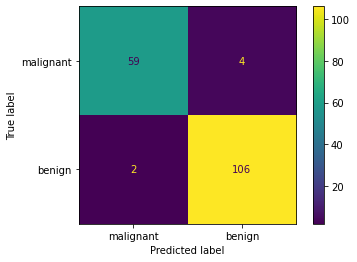

In [30]:
plot_confusion_matrix(knn_cv, X_test, y_test, display_labels=target_names)
plt.show()

In [33]:
y_pred = knn_cv.predict(X_test)
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

